In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
from ress.utils import plotVectors

In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
# Plot parameters
plt.style.use('ggplot')
# plt.rcParams['axes.facecolor']='w'

%pylab inline
pylab.rcParams['figure.figsize'] = (3, 3)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0
# rcParams.keys()

Populating the interactive namespace from numpy and matplotlib


In [29]:
# Avoid inaccurate floating values (for inverse matrices in dot product for instance)
# See https://stackoverflow.com/questions/24537791/numpy-matrix-inversion-rounding-errors
np.set_printoptions(suppress=True)

# 2.4 Linear Dependence and Span

This chapter is quite heavy by its size and its content but I did everything I could to make this content more intuitive and visual. We will see how to graphically represent systems of equations, how to interpret the number of solutions of a system, the idea of linear combination and a lot more. We will use Numpy/Matplotlib as a tool to experiment these concepts and gain a more concrete understanding.


Since it is all about system of linear equations, let's start again with the set of equations

$$\boldsymbol{Ax}=\boldsymbol{b}$$

We saw in [2.2]() that this system corresponds to

$$
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_n
$$

So there are multiple equations with multiple unknowns. We know $A_{1,1}...A_{m,n}$ and $b_1...b_n$. To solve the system we need to find the value of the variables $x_1...x_n$ that satisfy each equation.

# Number of solutions

The first thing to ask when we face such a system of equations is: what is the number of solutions ?

Three cases can represent the number of solutions of the system of equations $\boldsymbol{Ax}=\boldsymbol{b}$.
 
 1. No solution
 2. 1 solution
 3. An infinite number of solutions
 
## Why there can't be more than 1 solution and less than an infinite number of solutions ?

### Intuition

Simply because we deal with **linear** systems! Two lines can't cross more than once.

Imagine that we are in two dimensions and that we have two equations. The solutions of the system correspond to the intersection of the lines. One option is that the two lines never cross (parallel), one option is that they cross once, and the last options is that they cross everywhere (superimposed):

<img src="images/numberSolutions.png" width="800" alt="numberSolutions">

### Proof

There can't be more than 1 and less than an infinite number of solutions. For instance, let's imagine that $x$ and $y$ are two solutions of our system. This means that

$$
\begin{cases}
\boldsymbol{Ax}=\boldsymbol{b}\\\\
\boldsymbol{Ay}=\boldsymbol{b}
\end{cases}
$$

In this case, $z=\alpha x + (1-\alpha y)$ is also a solution for any value of $\alpha$. If z is a solution, we can say that $\boldsymbol{Az}=\boldsymbol{b}$. Indeed, if we plug $\boldsymbol{z}$ into the equation we obtain

$$
\begin{align*}
\boldsymbol{Az}&=\boldsymbol{A}(\alpha x + (1-\alpha y))\\\\
    &=\boldsymbol{Ax}\alpha + \boldsymbol{A}(1-\alpha y)\\\\
    &=\boldsymbol{Ax}\alpha + \boldsymbol{Ay}(1-\alpha)
\end{align*}
$$

And since $\boldsymbol{Ax}=\boldsymbol{Ay}=\boldsymbol{b}$. This leads to

$$
\begin{align*}
\boldsymbol{Az}&=\boldsymbol{b}\alpha + \boldsymbol{b}(1-\alpha)\\\\
    &=\boldsymbol{b}\alpha + \boldsymbol{b}-\boldsymbol{b}\alpha\\\\
    &=\boldsymbol{b}
\end{align*}
$$

So $z$ is also a solution.

# Matrix representation of the system

As we saw it the equation $\boldsymbol{Ax}=\boldsymbol{b}$ can be represented by a matrix $\boldsymbol{A}$ containing the weigths of each variable and a vector $\boldsymbol{x}$ containing each variable. The product of $\boldsymbol{A}$ and $\boldsymbol{x}$ gives $\boldsymbol{b}$ that is another vector of size *m*:

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\\\
    b_2 \\\\
    \cdots \\\\
    b_m
\end{bmatrix}
$$

Which corresponds to the set of linear equations

$$
A_{1,1}x_1 + A_{1,2}x_2 + \cdots + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + \cdots + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + \cdots + A_{m,n}x_n = b_n
$$

Here are some intuitions about what is represented by these matrices. The number of columns of A is the number of dimensions of our vector space. It is the number *n* of directions we can travel by. The number of solutions of our linear system corresponds to the number of ways we can reach $b$ by travelling through our $n$ dimensions.

But to understand this, we need to underline that two possibilities exist to represent the system of equations: ***the row figure*** and ***the column figure***.

# Graphical views: Row and column figures


I recommend to look at [this video lesson of Gilbert Strang](http://ia802205.us.archive.org/18/items/MIT18.06S05_MP4/01.mp4). It provides a very nice intuition about these two ways of looking at a system of linear equations.


When you are looking to the matrix $\boldsymbol{A}$:

$$
\boldsymbol{A}=\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
$$

You can consider its rows or its columns separatly. Recall that the values are the weights corresponding to each variable. Each row synthetizes one equation. Each column is the set of weights given to 1 variable.

It is possible to draw a graphical represention of the set of equations looking at the rows or at the columns.

## Graphical view 1: the row figure

The row figure is maybe more usual because it is the representation used when we have only one equation. It can now be extended to an infinite number of equations and unknowns (even if it would be hard to represent a 9-dimensional hyperplane in a 10-dimensional space...).

The solutions of the linear system of equations are the sets of values of $x_1...x_n$ that satisfy all equations, that is to say, the values taken by the unknowns. For instance, in the case of $n=2$ the equations correspond to lines in a 2-D space and the solution of the system is the intersection of these lines.

<img src="images/3dAxes.png" width="900" alt="3dAxes">

Note that associating one direction in space to one parameter is only one way to represent the equation. There are number of ways to represent more than 3 parameters systems. For instance, you can add colors to have the representation of a fourth dimension. It is all about **representation**.

A linear system of equations can be viewed as a set of $m$ $(n-1)$-dimensional hyperplanes in a *n*-dimensional space. So the linear system can be characterized with its number of equations ($m$) and the number of unknown variables ($n$).

- If there is more equations than unknows the system is called **overdetermined**. In the following example we can see a system of 3 equations (represented as 3 lines) and 2 unknowns (corresponding to 2 dimensions). In this case there is no solution since there is no point on the three lines:

<img src="images/overdeterminedSystem.png" width="300" alt="overdeterminedSystem">

- If there is more unknowns the system is called **underdetermined**. In the following picture, there is only 1 equation (1 line) and 2 dimensions. Each point that is on the line is a solution of the system. In this case there is an infinite number of solutions:

<img src="images/underdeterminedSystem.png" width="300" alt="underdeterminedSystem">


Let's see some examples to clarify this.

### Example 1. 

$m=1$, $n=2$: **1 equation and 2 variables**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1
$$

The graphical interpretation of $n=2$ is that we have a 2-D space. So we can represent it with 2 axes. Since our hyperplane is of $n-1$-dimensional, we have a 1-D hyperplane. This is simply a line. As $m=1$, we have only one equation. This means that we have only one line characterizing our linear system.

Note that the last equation can also be written in a way that may be more usual:

$$
y = ax + b
$$

with $y$ corresponding to $x_2$, $x$ corresponding to $x_1$, $a$ corresponding to $A_{1,1}$ and $A_{1,2}=1$.

In this first example we will take the following equation:

$$
y = 2x + 1
$$

Let's draw the line of this equation with Numpy and Matplotlib.

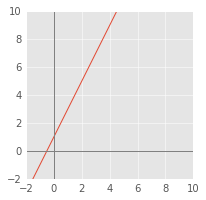

In [30]:
x = np.arange(-10, 10)
y = 2*x + 1

plt.figure()
plt.plot(x, y)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()
plt.close()

#### Coding tips: Draw an equation

To draw the equation with Matplotlib, we first need to create a vector with all the $x$ values. Actually, since this is a line, only two points would have been sufficient. But with more complex functions, the length of the vector $x$ correspond to the sampling rate. So here we used the Numpy function `arrange()` (see the [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)) to create a vector from $-10$ to $10$ (not included).

In [31]:
np.arange(-10, 10)

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

The first argument is the starting point and the second the ending point. You can add a third argument to specify the step:

In [32]:
np.arange(-10, 10, 2)

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8])

Then we create a second vector $y$ that is a transformation of the $x$ vector. Numpy will take each value of $x$ and apply the equation formula to it.

In [33]:
x = np.arange(-10, 10)
y = 2*x + 1
y

array([-19, -17, -15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,   5,
         7,   9,  11,  13,  15,  17,  19])

Finally, you just need to plot these vectors.

#### Solutions

The solutions of this linear system correspond to the value of x and y such as $y=2x+1$. Graphically, it corresponds to each points on the line so there is an infinite number of solution. For instance, one solution is $x=0$ and $y=1$, or $x=1$ and $y=3$ and so on.

### Example 2.

*m*=2, *n*=2: **2 equations and 2 unknowns**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2
$$

The graphical interpretation of this system is that we still have lines in a 2-D space. However this time there are 2 lines since there are 2 equations.

Let's take these equations as example:

$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2
\end{cases}
$$


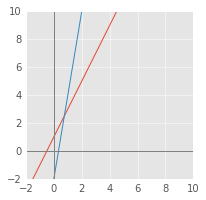

In [34]:
x = np.arange(-10, 10)
y = 2*x + 1
y1 = 6*x - 2

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()
plt.close()

With 2 lines in a 2-D space, there are multiple possible cases. On the above figure, the two lines are crossing so there is one unique solution. If they are superimposed (same equation or equivalent, *cf*. linear dependance bellow) there are a infinite number of solutions since each points of the lines corresponds to an intersection. If they are parallel, there is no solution.

This is an example of this general rule: we can't have more than one solution but less than infinitely many solutions for a particular value of $\boldsymbol{b}$. The same thing can be observed with other values of $m$ (number of equations) and $n$ (number of dimensions). For instance, two 2-D planes in a 3-D space can be superposed (infinitely many solutions), or crossed (infinitely many solutions since their crossing is a line), or parallel (no solution).

### Example 3.

*m*=3, *n*=2: **3 equations and 2 unknowns**

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2\\\\
A_{3,1}x_1 + A_{3,2}x_2 = b_3
$$

The same idea stands with more than 2 equations in a 2D space. In that example we have the following 3 equations:

$$
\begin{cases}
y = 2x + 1\\\\
y = 6x - 2\\\\
y = \frac{1}{10}x+6
\end{cases}
$$

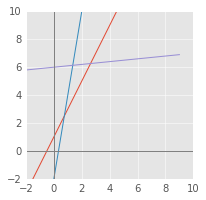

In [35]:
x = np.arange(-10, 10)
y = 2*x + 1

y1 = 6*x - 2
y2 = 0.1*x+6

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()
plt.close()

In the above case, there is 3 equations and no solution because there is no point in space that is on each of these lines.

# Linear combination

Before going to the column figure, we need to talk about linear combination. The linear combination of 2 vectors corresponds to their weighted sum.

### Example 4.

Let's take two vectors $
\vec{u}=
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$ and
$
\vec{v}=
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$. These two vectors have 2 dimensions and thus contain coordinates in 2D.


The linear combination of $\vec{u}$ and $\vec{v}$ is

$$
a\vec{u}+b\vec{v}= a
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} + b\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

Graphically, the vectors are added to reach a specific point in space. For example if $a=2$ and $b=1$:

$$
2\vec{u}+\vec{v}= 2
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} +
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix} =
\begin{bmatrix}
    2 \cdot 1 + 2 \\\\
    2 \cdot 3 + 1
\end{bmatrix} =
\begin{bmatrix}
    4 \\\\
    7
\end{bmatrix}
$$

The sum of $\vec{u}$ and $\vec{v}$ will reach the point of corrdinates $(4, 7)$. To show that on a plot, I will use a small function that I wrote and that you can find in the folder `ress`. It takes and set of coordinates and plot the corresponding vectors:

(0, 5)

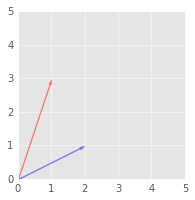

In [51]:
plotVectors([[1, 3], [2, 1]], ['red', 'blue'])
plt.xlim(0, 5)
plt.ylim(0, 5)

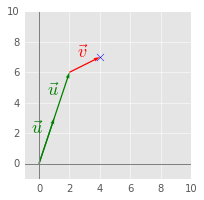

In [55]:
x = 2

u = [0,0,1,3]
v = [2,6,2,1]

plt.quiver([u[0], x*u[0], v[0]],
           [u[1], x*u[1], v[1]],
           [u[2], x*u[2], v[2]],
           [u[3], x*u[3], v[3]],
           angles='xy', scale_units='xy', scale=1, color=['g', 'g', 'r', 'r', 'b'])
plt.xlim(-1, 10)
plt.ylim(-1, 10)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.scatter(4,7,marker='x',s=50)
plt.text(-0.5, 2, r'$\vec{u}$', color='g', size=18)
plt.text(0.5, 4.5, r'$\vec{u}$', color='g', size=18)
plt.text(2.5, 7, r'$\vec{v}$', color='r', size=18)
plt.show()
plt.close()

# Span

Take the vectors $\vec{u}$ and $\vec{v}$ from the previous example and think about all the points you can reach by their combination changing $x$ and $y$. This set of points is the span of the set of vectors $\{\vec{u}, \vec{v}\}$.

# Note on spaces and subspaces

(For more details see Strang (2006), p.70)

The space of a vector determines all the values that can be taken by this vector. The vector spaces are denoted $\mathbb{R}$ because the values are real numbers. If there are multiple dimensions the space is denoted $\mathbb{R}^n$ with $n$ corresponding to the number of dimensions. For instance $\mathbb{R}^2$ is the space of the usual x-y plane where x and y values are real numbers.

If you take a 2-dimensional plane in $\mathbb{R}^3$ (3-dimensional space), this plane is a **subspace** of your original $\mathbb{R}^3$ space. On the same manner, if you start with a $\mathbb{R}^2$ space and take a line in this space. This line a subspace of the original space.

**The linear combination of vectors gives vector in the original space**:

Every linear combination of vector inside a space will stay in this space. For instance, if you take 2 lines in a $\mathbb{R}^2$ space, any linear combinations will give you a vector also in the same $\mathbb{R}^2$ space.

## Graphical view 2: the column figure

It is also possible to represent the set of equations by considering that the solution vector $\boldsymbol{b}$ correspond to a linear combination of each columns multiplied by its weight.

From the set of equations

$$
A_{1,1}x_1 + A_{1,2}x_2 + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + A_{m,n}x_n = b_m
$$

The column form is

$$
x_1
\begin{bmatrix}
    A_{1,1}\\\\
    A_{2,1}\\\\
    A_{m,1}
\end{bmatrix}
+
x_2
\begin{bmatrix}
    A_{1,2}\\\\
    A_{2,2}\\\\
    A_{m,2}
\end{bmatrix}
+
x_n
\begin{bmatrix}
    A_{1,n}\\\\
    A_{2,n}\\\\
    A_{m,n}
\end{bmatrix}
=
\begin{bmatrix}
    b_1\\\\
    b_2\\\\
    b_m
\end{bmatrix}
$$

On a graphical point of view, we have to travel from the origin (zero on every dimensions) to the point of coordinate $\boldsymbol{b}$. The columns of $\boldsymbol{A}$ give us the direction we can travel by and the weight is the lenght of the travel in that direction.

### Example 5. 

$m=2$, $n=2$: 2 equations and 2 variables

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1
A_{2,1}x_1 + A_{2,2}x_2 = b_2
$$

$$
\begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4
\end{cases}
$$

$$
x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

The goal is to find the value of the weights $x$ and $y$ for which the linear combination of the vector
$\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}$
and
$\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
$
gives the vector 
$\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$

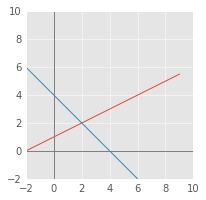

In [53]:
x = np.arange(-10, 10)
y = 0.5*x + 1

y1 = -x + 4

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()
plt.close()

We can see that the solution (the intersection of the lines representing our two equations) is $x=2$ and $y=2$. This means that the linear combination is the following:

$$
2
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
2
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

Let's say that $
\vec{u}=
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
$ and $
\vec{v}=
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
$

If we think into the column figure this implies that we can reach the point of coordinates $(-1, 4)$ if we add two times the vector $\vec{u}$ and two times the vector $\vec{v}$:

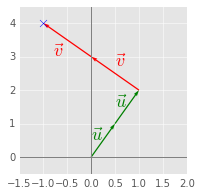

In [54]:
u = [0,0,0.5,1]
u_bis = [u[2],u[3],u[2],u[3]]
v = [2*u[2],2*u[3],-1,1]
v_bis = [2*u[2]-1,2*u[3]+1,v[2],v[3]]
# w = [0,0,-1,2]
plt.quiver([u[0], u_bis[0], v[0], v_bis[0]],
           [u[1], u_bis[1], v[1], v_bis[1]],
           [u[2], u_bis[2], v[2], v_bis[2]],
           [u[3], u_bis[3], v[3], v_bis[3]],
           angles='xy', scale_units='xy', scale=1, color=['g', 'g', 'r', 'r'])
# plt.rc('text', usetex=True)
plt.xlim(-1.5, 2)
plt.ylim(-0.5, 4.5)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.scatter(-1,4,marker='x',s=50)
plt.text(0, 0.5, r'$\vec{u}$', color='g', size=18)
plt.text(0.5, 1.5, r'$\vec{u}$', color='g', size=18)
plt.text(0.5, 2.7, r'$\vec{v}$', color='r', size=18)
plt.text(-0.8, 3, r'$\vec{v}$', color='r', size=18)
plt.show()
plt.close()

## Determine if the system has 1 and only 1 solution for every value of b

- Requirement 1. the system must have at least one solution for each value of $\boldsymbol{b}$: $n\geq m$

The column figure is helpful to understand why the linear system have no solution if $n$ (the number of unknowns) is smaller than $m$ (the number of equations). Let's add 1 equation to the above system in order to end up with a ($3\times2$) matrix:

$$
\begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4\\\\
y = 7x + 2
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4\\\\
7x-y=2
\end{cases}
$$

$$
x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1 \\\\
    7
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4 \\\\
    2
\end{bmatrix}
$$

So we are still traveling on our 2-dimensional space (see the plot of the column space above) but the point that we are looking for is defined by 3 dimensions. There are cases where the third coordinate does not rely on our 2-dimensional x-y plane and then where no solution exists.

## Linear dependence

The number of column needed for our system to have a solution for every value of b is important. But the number that we have to take into account is the number of **linearly independant** columns. Columns are linearly dependent if one of them is a linear combination of others. Thinking in the column picture, the direction of two linearly dependent vectors is the same. This doesn't add a dimension that we can use to travel and reach $\boldsymbol{b}$.

Here is an example of linear system containing linear dependency:

$$
\begin{cases}
y = 2x+6\\\\
y = 2x
\end{cases}
\Leftrightarrow
\begin{cases}
2x-y = -6\\\\
2x-y=0
\end{cases}
$$

The row figure show that the system has no solution:

In [ ]:
x = np.arange(-10, 10)
y = 2*x + 6

y1 = 2*x

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()
plt.close()

The column figure illustrates the point as well:

$$
x
\begin{bmatrix}
    2 \\\\
    2
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    -1
\end{bmatrix}
=
\begin{bmatrix}
    -6 \\\\
    0
\end{bmatrix}
$$


In [ ]:
u = [0,0,2,2]
u_bis = [u[2],u[3],u[2],u[3]]
v = [0,0,-1,-1]
v_bis = [2*u[2]-1,2*u[3]+1,v[2],v[3]]
# w = [0,0,-1,2]
plt.quiver([u[0], v[0]],
           [u[1], v[1]],
           [u[2], v[2]],
           [u[3], v[3]],
           angles='xy', scale_units='xy', scale=1, color=['g', 'r'])
# plt.rc('text', usetex=True)
plt.xlim(-7, 3)
plt.ylim(-2, 3)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.scatter(-6,0,marker='x',s=50)
plt.text(-6, 0.5, r'$b$', color='b', size=18)
# plt.text(0.5, 1.5, r'$\vec{u}$', color='g', size=18)
# plt.text(0.5, 2.7, r'$\vec{v}$', color='r', size=18)
# plt.text(-0.8, 3, r'$\vec{v}$', color='r', size=18)
plt.show()
plt.close()

- Requirement 2. the system must have **only** one solution for each value of $\boldsymbol{b}$: $n=m$

We saw that a requirement is that $n$ (the number of unknowns) must not be inferior to $m$ (the number of equations). But if we want our system to have one and only one solution a second requirement is that $n$ must not be bigger than $m$.

Let's take the example of a ($2\times 3$) matrix that corresponds to a set of 2 equations with 3 unknowns variables:


$$
\begin{cases}
8x+y+z=1\\\\
x+y+z=1
\end{cases}
$$

$$
x
\begin{bmatrix}
    8 \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
+
z
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    1 \\\\
    1
\end{bmatrix}
$$

Here is the representation of the planes plotted with the help of this [website](https://technology.cpm.org/general/3dgraph/):

<img src="images/2planes.png" alt="2planes" style="width: 500px;"/>

We can see that in the best case the two planes are not parallel and there are solutions to the set of equations that is to say it exists points that rely on both planes. But we can also see that if there is inevitably an infinite number of points on the intersection (a line that we can see on the figure). We need a third plane to have a unique solution.

The resulting of all of this is that the system needs a **square matrix** ($m=n$) with linearly independant columns to have a unique solution for every values of $\boldsymbol{b}$.

The inverse of a matrix exists only if the set of equations has one and only one solution for each value of $\boldsymbol{b}$ because:

- The matrix $\boldsymbol{A}$ cannot have more than 1 inverse. Imagine that $\boldsymbol{A}$ has 2 inverses $\boldsymbol{B}$ and $\boldsymbol{C}$ such as $\boldsymbol{AB}=\boldsymbol{I}$ and $\boldsymbol{AC}=\boldsymbol{I}$. This would mean that $\boldsymbol{B}=\boldsymbol{C}$.

- The solution of the system $\boldsymbol{Ax}=\boldsymbol{b}$ is $\boldsymbol{x}=\boldsymbol{A} ^{-1} \boldsymbol{b}$. So if there are multiple solutions, there are multiple inverse and the first point is not met.

For more details about the row and the column figure, have a look at the books of Gilbert Strang [some ressources here](http://math.mit.edu/~gs/dela/dela_4-1.pdf). There are tons of really great examples and graphical explanations! And the *1.2 Geometry of linear equations* in 'Linear algebra and its applications' also from Gilbert Strang.

# References

[1] Strang, G. (2006). Linear Algebra and Its Applications, 4th Edition (4th edition). Belmont, CA: Cengage Learning.

[2] Strang, G. (2014). Differential Equations and Linear Algebra (UK ed. edition). Wellesley, Mass: Wellesley-Cambridge.

[3] [The column space of a matrix. Video from Gilbert Strang](https://ocw.mit.edu/resources/res-18-009-learn-differential-equations-up-close-with-gilbert-strang-and-cleve-moler-fall-2015/differential-equations-and-linear-algebra/vector-spaces-and-subspaces/the-column-space-of-a-matrix/)

[4] [Wikipedia - System of linear equations](https://en.wikipedia.org/wiki/System_of_linear_equations)

[5] [Numpy arange()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)

In [ ]:
def plotVectors(vecs, cols):
    plt.figure()
    print len(vecs)
    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
#     y = np.concatenate([[0,0],vecs[1]])
    

        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=1/float((len(vecs))))

#     plt.xlim(-1, 2)
#     plt.ylim(-1, 2)
    plt.axvline(x=0, color='grey')
    plt.axhline(y=0, color='grey')

#     plt.text(1, 1.5, r'$\vec{u}$', size=18)
#     plt.text(1.5, -1, r'$\vec{v}$', size=18)

#     plt.show()
#     plt.close()
